In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import seaborn as sns
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
%matplotlib inline
tqdm.pandas()
os.chdir('../..')

In [2]:
os.listdir()

['.git', 'data', 'README.md', 'src']

In [4]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
os.environ['PYTHONWARNINGS'] = 'ignore'  
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
plt.style.use('seaborn-v0_8-muted')

In [5]:
df=pd.read_csv("data/raw/train.csv") 
df.head()

id                                       comment_text  toxic  severe_toxic  obscene  threat  insult  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0             0        0       0       0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0             0        0       0       0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0             0        0       0       0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0             0        0       0       0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0             0        0       0       0   

   identity_hate  
0              0  
1              0  
2              0  
3              0  
4              0

In [6]:
print(df.shape)
print(df.columns)

(159571, 8)
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], dtype='object')


In [7]:
def autolabel(rects, gap=0.001):
    ymax = max([r.get_height() for r in rects])
    for rect in rects:
        h = rect.get_height()
        x = rect.get_x() + rect.get_width()/2
        plt.text(x, h + ymax*gap, f'{int(h)}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

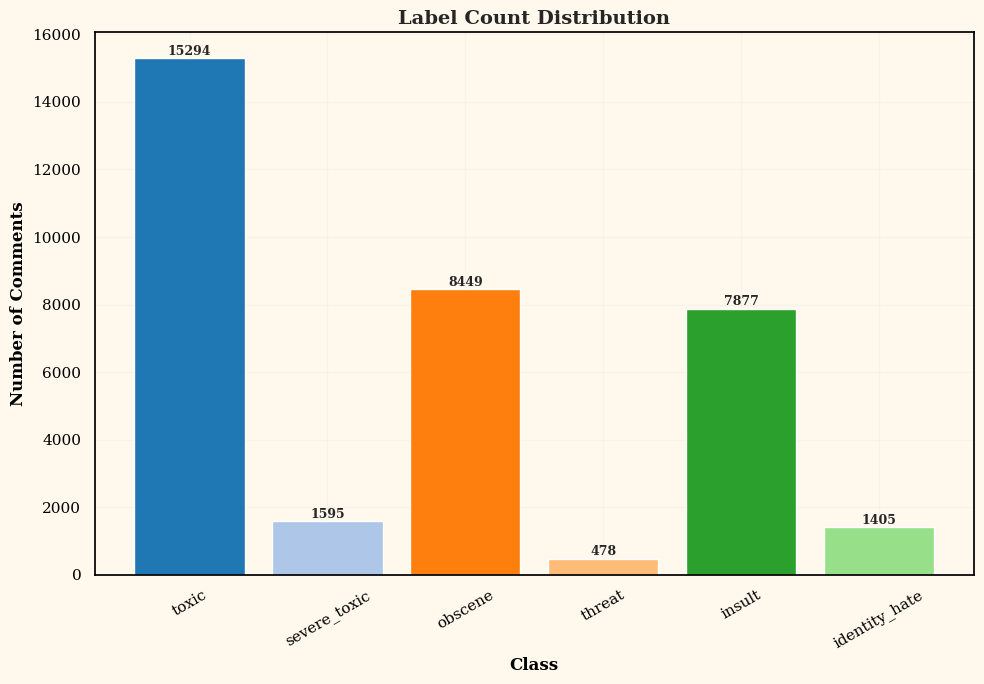

In [8]:
labels = df.columns[2:]
counts = [df[label].sum() for label in labels]
plt.figure(figsize=(10,7))
bars = plt.bar(labels, counts, color=plt.cm.tab20.colors[:len(labels)])
plt.title("Label Count Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Class", fontsize=12, fontweight='bold')
plt.ylabel("Number of Comments", fontsize=12, fontweight='bold')
plt.xticks(rotation=30)
autolabel(bars)
plt.tight_layout()
plt.show()


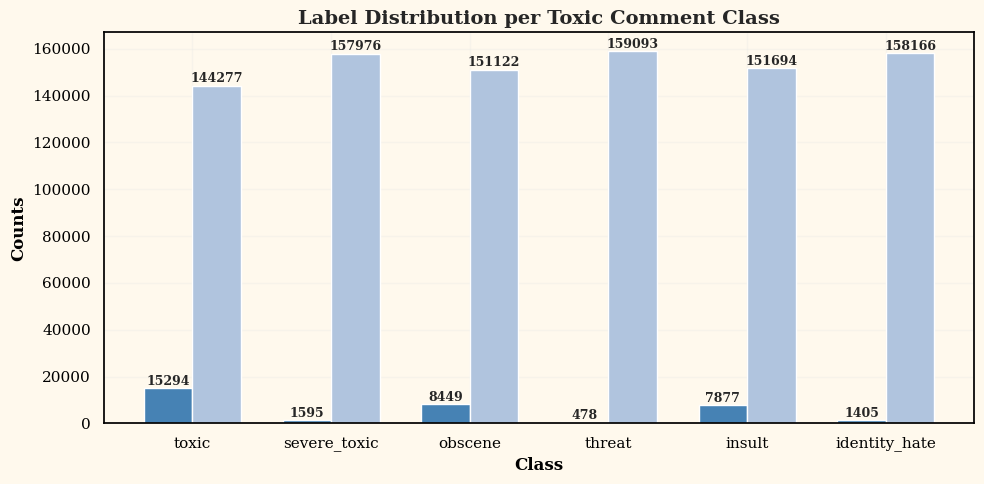

In [125]:
bars1 = [df[label].sum() for label in labels]
bars2 = [(df[label] == 0).sum() for label in labels]

barWidth = 0.35
r1 = np.arange(len(bars1))
r2 = r1 + barWidth

plt.figure(figsize=(10,5))
plt.title('Label Distribution per Toxic Comment Class', fontsize=14, fontweight='bold')
rects1 = plt.bar(r1, bars1, width=barWidth, color='steelblue',      label='labeled = 1')
rects2 = plt.bar(r2, bars2, width=barWidth, color='lightsteelblue', label='labeled = 0')

plt.ylabel('Counts', fontweight='bold')
plt.xlabel('Class',  fontweight='bold')
plt.xticks(r1 + barWidth/2, labels)  
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()


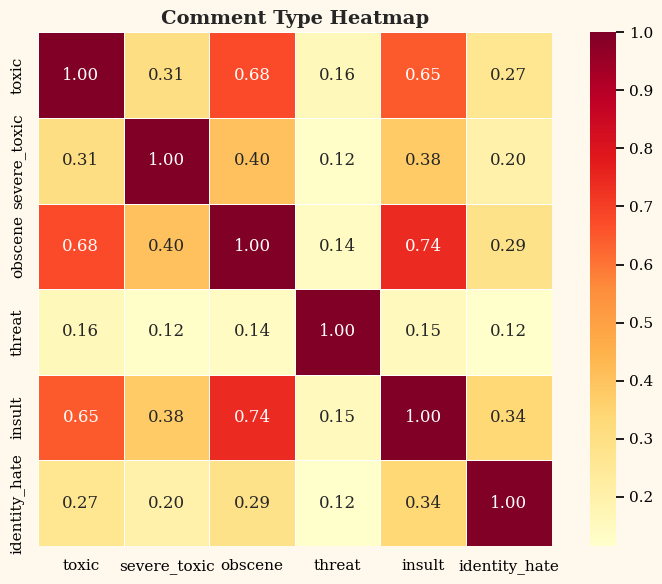

In [126]:
corr = df[labels].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",         
    cmap="YlOrRd",        
    linewidths=0.5,
    square=True
)
plt.yticks(rotation=90)
plt.xticks(rotation=0)
plt.title("Comment Type Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

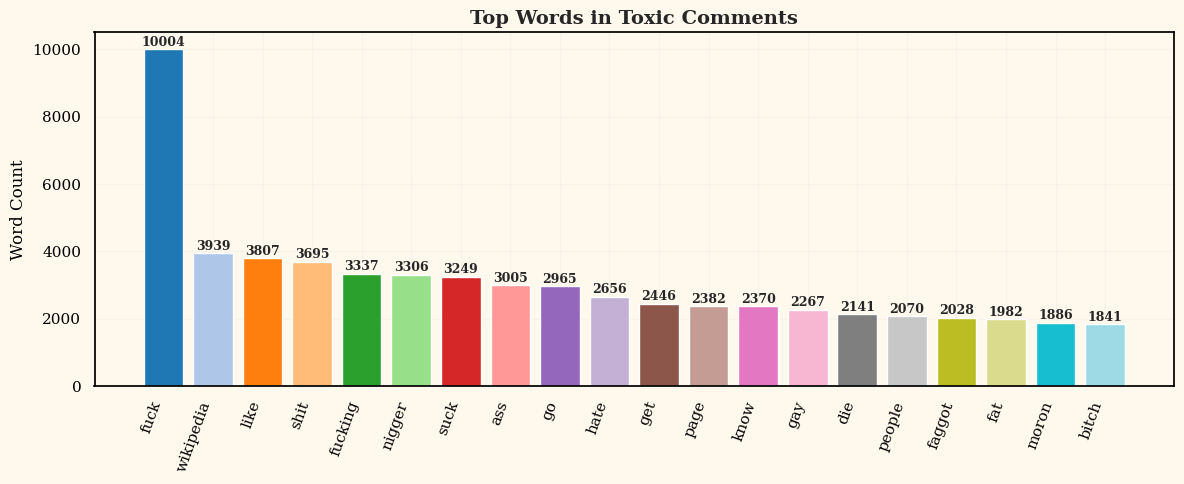

In [137]:
df['toxicity'] = (df[labels].sum(axis=1) > 0).astype(int)
df_toxic = df[df['toxicity'] == 1]
STOPWORDS = set(stopwords.words('english'))
def clean_text_ascii(s):
    s = str(s).lower()
    s = re.sub(r'[^a-z\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def labelize(s):
    toks = clean_text_ascii(s).split()
    toks = [t for t in toks if len(t) >= 2 and t not in STOPWORDS]
    return toks

counter = Counter()
df_toxic['comment_text'].astype(str).apply(lambda x: counter.update(labelize(x)))

TOP_N = 20
top_words = counter.most_common(TOP_N)
words, counts = zip(*top_words)

plt.figure(figsize=(12,5))
colors = plt.cm.tab20.colors * 3  
bars = plt.bar(words, counts, color=colors[:len(words)])
plt.title("Top Words in Toxic Comments", fontsize=14, fontweight='bold')
plt.ylabel("Word Count")
plt.xticks(rotation=70, ha='right')
autolabel(bars)
plt.tight_layout()
plt.show()


In [134]:
from wordcloud import WordCloud
def W_Cloud(label):
    threat_context = df[df[label] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top word in {label} comments", size=20)
    plt.show()

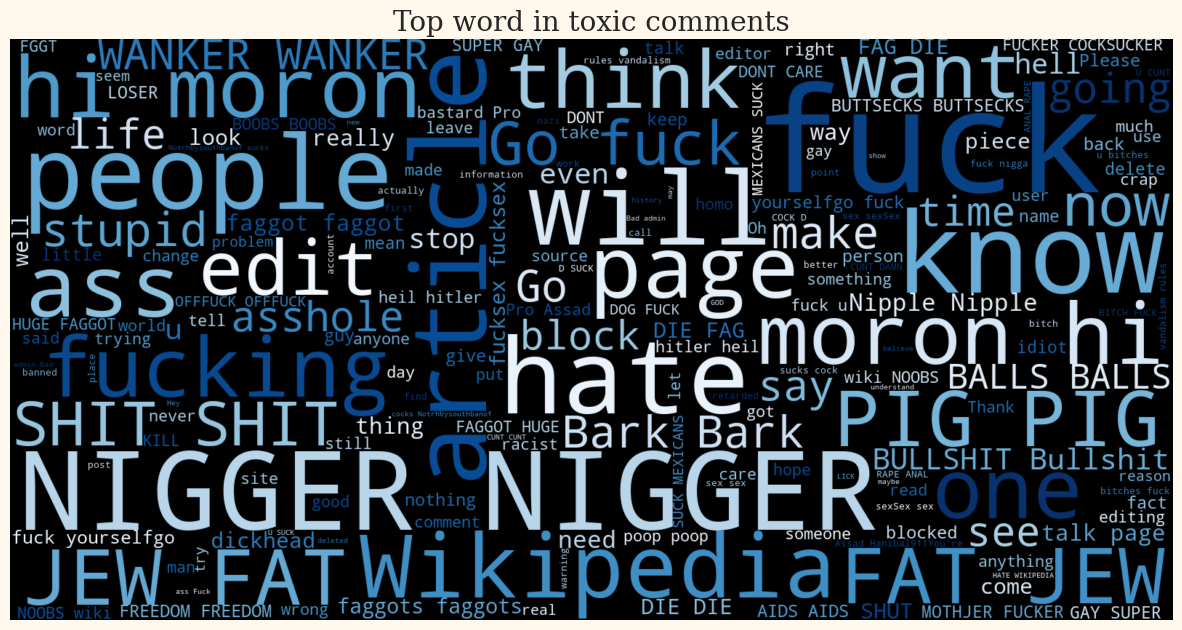

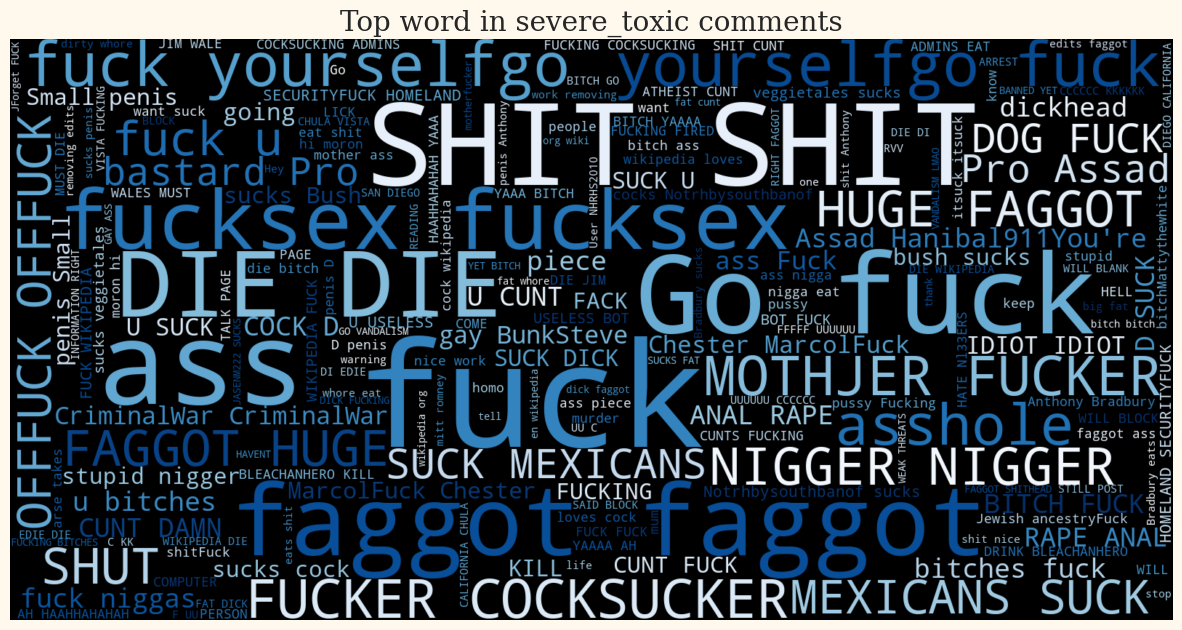

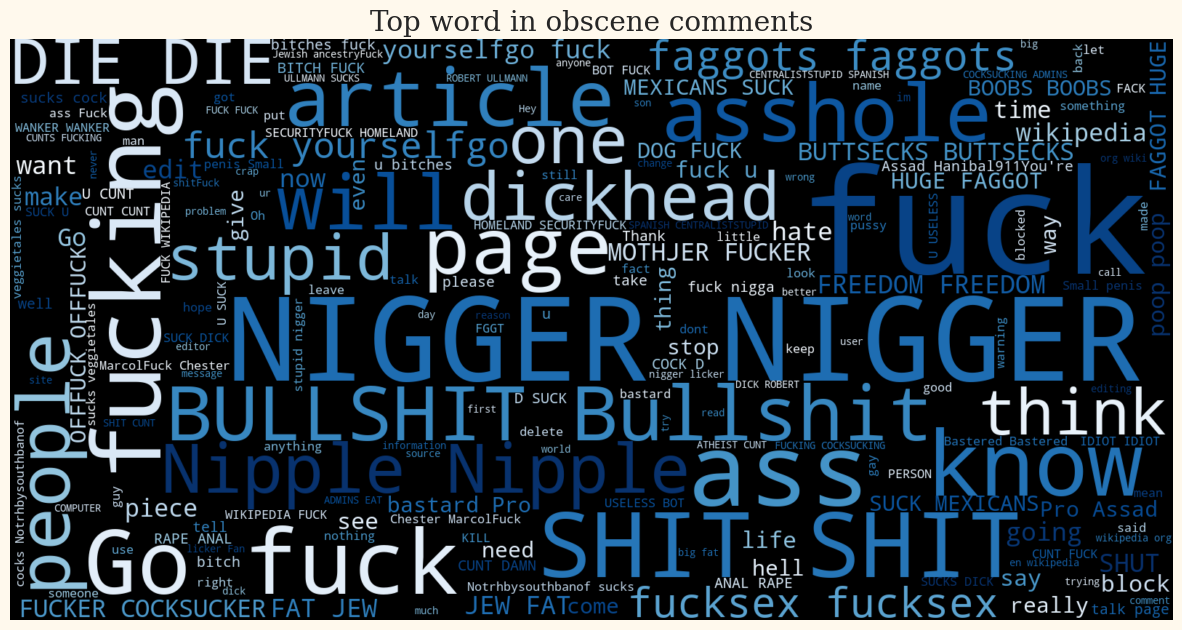

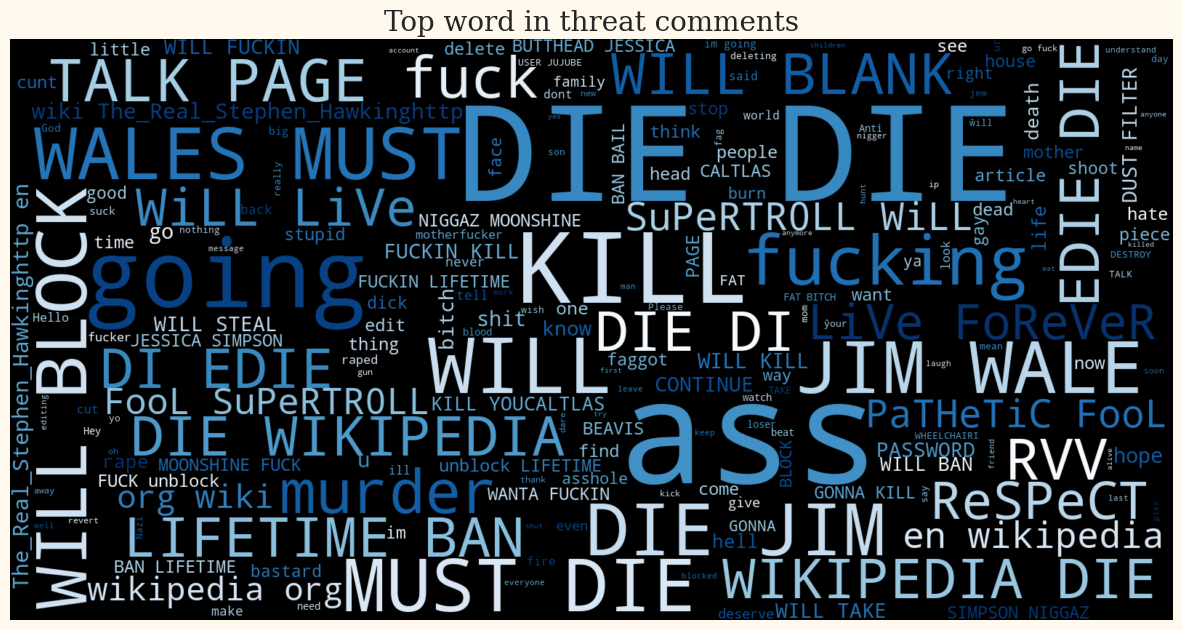

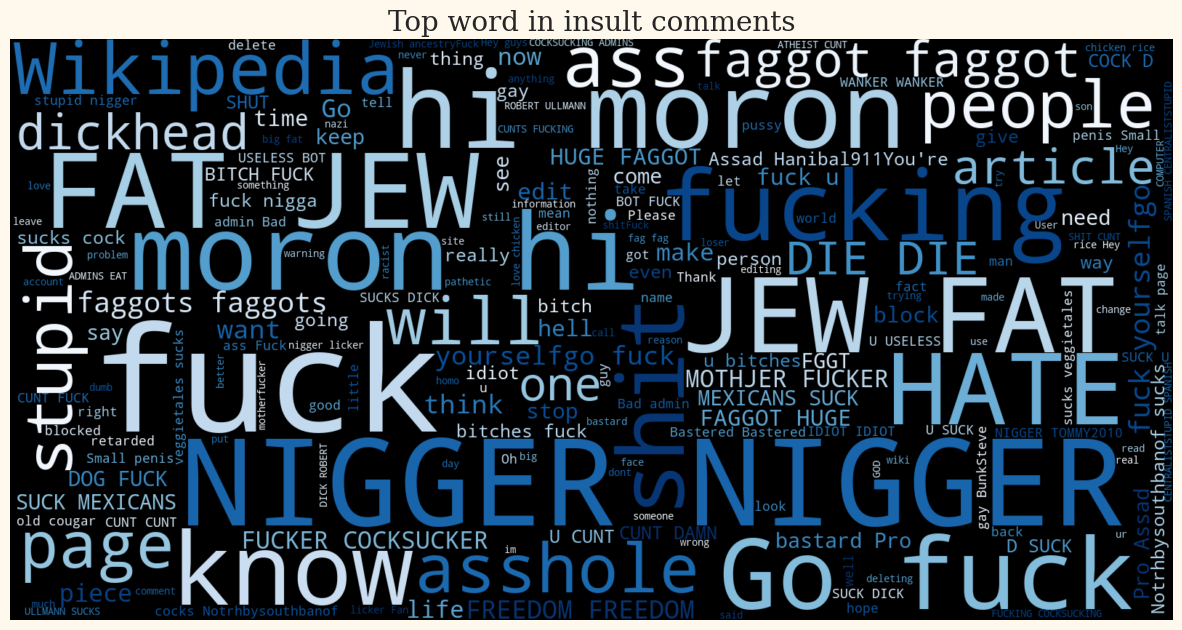

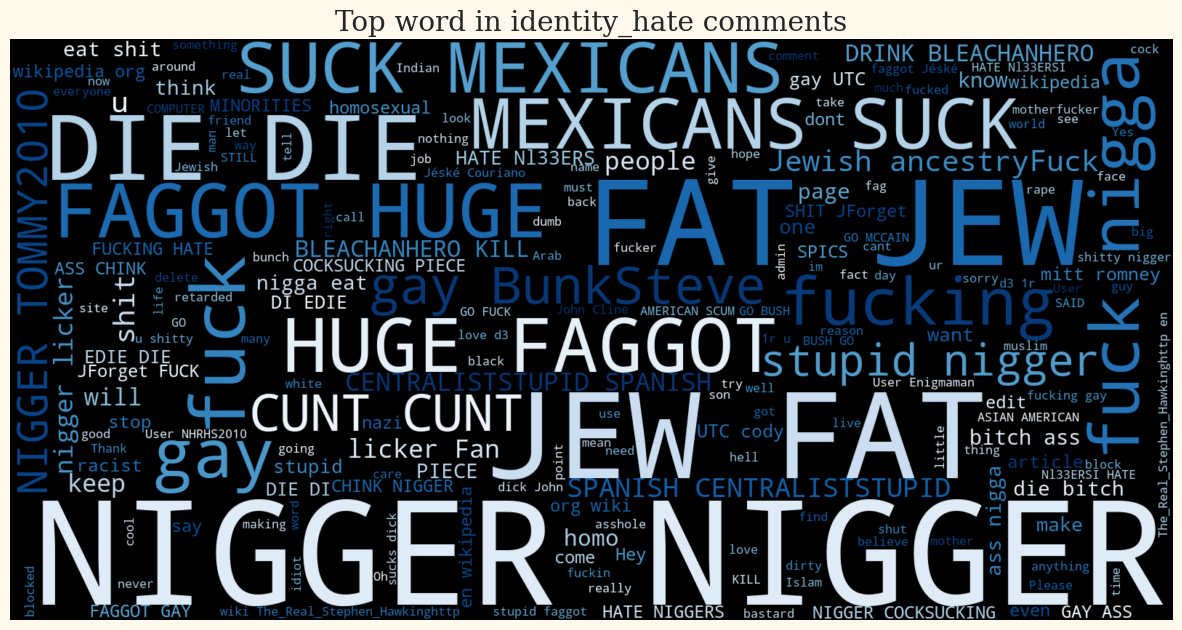

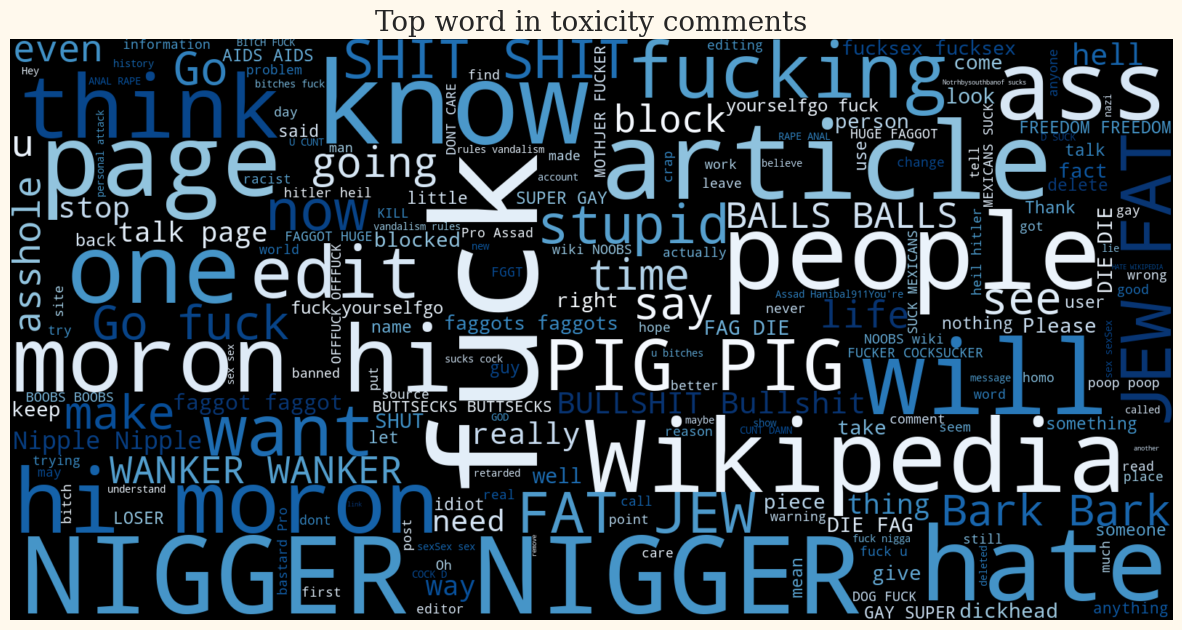

In [ ]:
for i in range (2, len(df.columns)):
    label = df.columns[i]
    W_Cloud(label.lower())